## Análisis Exploratorio de Datos (EDA) y Visualizaciones

El **Análisis Exploratorio de Datos (EDA)** es un enfoque para analizar conjuntos de datos para resumir sus características principales, a menudo con métodos visuales. El objetivo principal es descubrir patrones, detectar anomalías, probar hipótesis y verificar supuestos con la ayuda de métodos estadísticos y representaciones gráficas.

Las visualizaciones son fundamentales en el EDA porque permiten:
*   **Comprender la distribución** de una o varias variables.
*   **Identificar relaciones** entre variables.
*   **Detectar valores atípicos** (outliers) o errores en los datos.
*   **Comunicar hallazgos** de manera efectiva.
*   **Guiar la selección de modelos** o futuras transformaciones de datos.

A continuación, exploraremos los gráficos más comunes, cómo y cuándo usarlos, y cómo interpretarlos, con ejemplos prácticos en Python usando las librerías `pandas`, `matplotlib` y `seaborn`.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Cargar el archivo de datos proporcionado
# Asumimos que 'datos_inmobiliarios_simplificado.csv' contiene columnas relevantes para un análisis inmobiliario.
# Por ejemplo: 'Precio', 'Metros_Cuadrados', 'Habitaciones', 'Banios', 'Tipo_Propiedad', 'Distrito', 'Fecha_Publicacion'.
try:
    df_inm = pd.read_csv('/content/datos_inmobiliarios_simplificado.csv')
except FileNotFoundError:
    print("Error: El archivo 'datos_inmobiliarios_simplificado.csv' no se encontró.")
    print("Asegúrate de haber subido el archivo o de que la ruta sea correcta.")
    df_inm = pd.DataFrame() # Crear un DataFrame vacío para evitar errores posteriores

# Mostrar las primeras filas y la información del DataFrame
if not df_inm.empty:
    print("DataFrame cargado:")
    display(df_inm.head())
    print("\nInformación del DataFrame:")
    df_inm.info()
    # Intentar convertir 'Fecha_Publicacion' a datetime si existe
    if 'Fecha_Publicacion' in df_inm.columns:
        df_inm['Fecha_Publicacion'] = pd.to_datetime(df_inm['Fecha_Publicacion'], errors='coerce')
        print("\nColumna 'Fecha_Publicacion' convertida a tipo datetime.")

DataFrame cargado:


,Precio,Tamaño_m2,Habitaciones,Baños,Antigüedad,DistanciaCentro_km,Zona,Garaje,Ascensor,Precio_m2
0,224836.0,98.9,3,1,13.0,7.1,Este,No,No,2273.37
1,193087.0,104.0,2,2,8.0,5.1,Sur,Sí,No,1856.61
2,232384.0,117.1,1,1,39.0,8.7,Sur,No,Sí,1984.49
3,276151.0,116.3,4,1,1.0,2.9,Este,Sí,No,2374.47
4,188292.0,55.6,4,1,NaN,3.5,Este,No,Sí,3386.55



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Precio              200 non-null    float64
 1   Tamaño_m2           200 non-null    float64
 2   Habitaciones        200 non-null    int64  
 3   Baños               200 non-null    int64  
 4   Antigüedad          190 non-null    float64
 5   DistanciaCentro_km  200 non-null    float64
 6   Zona                200 non-null    object 
 7   Garaje              190 non-null    object 
 8   Ascensor            190 non-null    object 
 9   Precio_m2           200 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 15.8+ KB


---

### 1. Histogramas

**¿Qué es?**
Un histograma es una representación gráfica de la distribución de frecuencias de una variable numérica. Divide el rango de valores de la variable en 'bins' (intervalos) y cuenta cuántas observaciones caen en cada bin. La altura de cada barra representa la frecuencia (o la densidad) de los datos en ese intervalo.

**¿Cuándo se usa?**
*   Para entender la forma de la distribución de una variable continua (p. ej., normal, sesgada, bimodal).
*   Para identificar el centro, la dispersión y la presencia de valores atípicos.
*   Para evaluar si los datos siguen una distribución específica (p. ej., normal).

**¿Cómo se interpreta?**
*   **Forma**: ¿Es simétrica, sesgada a la izquierda (cola a la izquierda), sesgada a la derecha (cola a la derecha)? ¿Tiene uno o varios picos (unimodal, bimodal, multimodal)?
*   **Centro**: ¿Dónde está el pico principal? Esto indica dónde se concentran la mayoría de los datos.
*   **Dispersión**: ¿Qué tan ancha es la distribución? Una distribución ancha indica una mayor variabilidad en los datos.
*   **Valores Atípicos**: Barras aisladas o colas muy largas en los extremos pueden sugerir la presencia de valores atípicos.

**Ejemplo paso a paso (con Python):**
Utilizaremos las columnas 'Precio' y 'Metros_Cuadrados' de nuestro DataFrame inmobiliario.

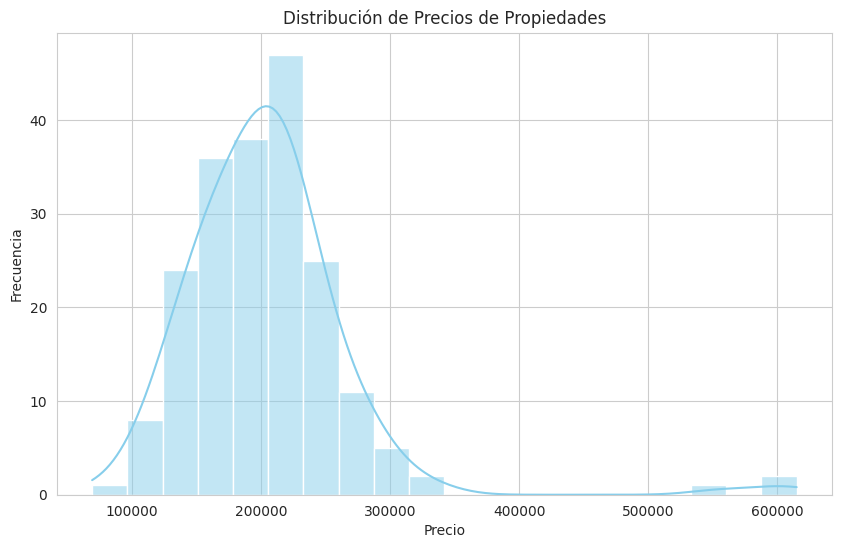

In [10]:
# Paso 1: Importar librerías (ya hecho en la celda anterior)
# import matplotlib.pyplot as plt
# import seaborn as sns

if not df_inm.empty and 'Precio' in df_inm.columns:
    # Crear el histograma para 'Precio'
    plt.figure(figsize=(10, 6))
    sns.histplot(df_inm['Precio'], bins=20, kde=True, color='skyblue') # `bins` controla el número de barras, `kde=True` añade una estimación de densidad del kernel
    plt.title('Distribución de Precios de Propiedades')
    plt.xlabel('Precio')
    plt.ylabel('Frecuencia')
    plt.show()

if not df_inm.empty and 'Metros_Cuadrados' in df_inm.columns:
    # Histograma con más detalle para 'Metros_Cuadrados'
    plt.figure(figsize=(10, 6))
    sns.histplot(df_inm['Metros_Cuadrados'], bins=15, kde=True, color='salmon')
    plt.title('Distribución de Metros Cuadrados')
    plt.xlabel('Metros Cuadrados')
    plt.ylabel('Frecuencia')
    plt.show()

---

### 2. Diagramas de Caja (Box Plots o Box-and-Whisker Plots)

**¿Qué es?**
Un diagrama de caja es una forma estandarizada de mostrar la distribución de datos basada en cinco números resumen: el mínimo, el primer cuartil (Q1), la mediana (Q2), el tercer cuartil (Q3) y el máximo. También puede mostrar valores atípicos.

**¿Cuándo se usa?**
*   Para visualizar la distribución de una variable numérica de manera concisa.
*   Especialmente útil para comparar la distribución de una variable numérica entre diferentes grupos de una variable categórica.
*   Para identificar rápidamente la presencia de valores atípicos.

**¿Cómo se interpreta?**
*   **Caja**: La caja central representa el **Rango Intercuartílico (IQR)**, que contiene el 50% central de los datos. El borde inferior es Q1 (percentil 25) y el borde superior es Q3 (percentil 75).
*   **Línea dentro de la caja**: La línea horizontal dentro de la caja es la **mediana** (Q2 o percentil 50).
*   **Bigotes**: Los 'bigotes' se extienden desde la caja hasta el valor más bajo y más alto dentro de 1.5 veces el IQR desde Q1 y Q3, respectivamente. Indican la variabilidad fuera del 50% central.
*   **Puntos individuales**: Los puntos fuera de los bigotes son considerados **valores atípicos**.

**Ejemplo paso a paso (con Python):**
Utilizaremos la columna 'Precio' y compararemos 'Precio' por 'Tipo_Propiedad'.

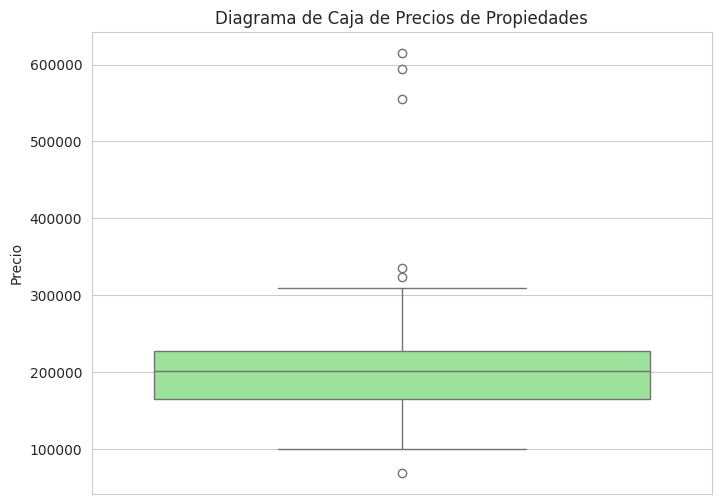

/tmp/ipython-input-2146844727.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Habitaciones', y='Precio', data=df_inm, palette='plasma')


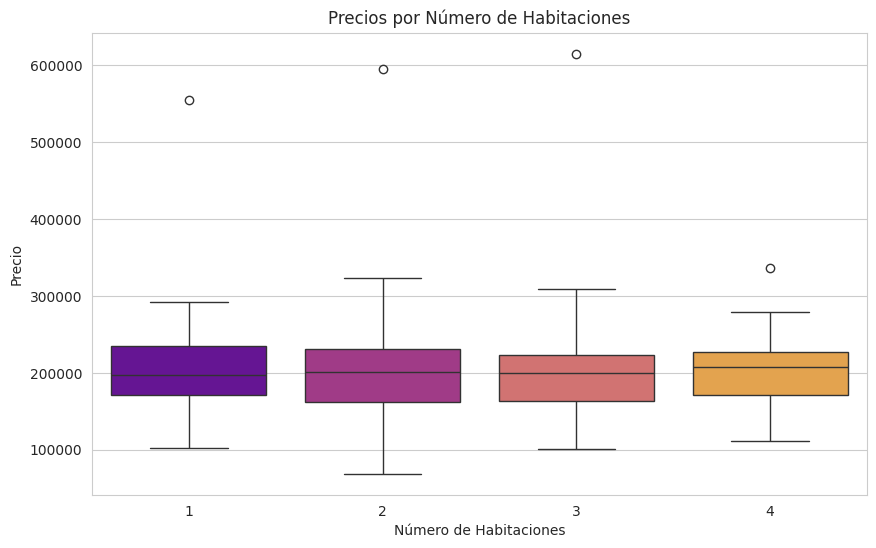

In [11]:
if not df_inm.empty and 'Precio' in df_inm.columns:
    # Crear un diagrama de caja simple para 'Precio'
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df_inm['Precio'], color='lightgreen') # `y` para un boxplot vertical, `x` para horizontal
    plt.title('Diagrama de Caja de Precios de Propiedades')
    plt.ylabel('Precio')
    plt.show()

if not df_inm.empty and 'Precio' in df_inm.columns and 'Tipo_Propiedad' in df_inm.columns:
    # Comparar 'Precio' por 'Tipo_Propiedad'
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Tipo_Propiedad', y='Precio', data=df_inm, palette='viridis')
    plt.title('Precios por Tipo de Propiedad')
    plt.xlabel('Tipo de Propiedad')
    plt.ylabel('Precio')
    plt.xticks(rotation=45) # Rotar etiquetas si son largas
    plt.tight_layout()
    plt.show()

if not df_inm.empty and 'Habitaciones' in df_inm.columns and 'Precio' in df_inm.columns:
    # Otro ejemplo: Precio por número de Habitaciones
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Habitaciones', y='Precio', data=df_inm, palette='plasma')
    plt.title('Precios por Número de Habitaciones')
    plt.xlabel('Número de Habitaciones')
    plt.ylabel('Precio')
    plt.show()

---

### 3. Gráficos de Barras (Bar Charts) y Gráficos de Conteo (Count Plots)

**¿Qué son?**
*   Un **Gráfico de Barras** representa la frecuencia o proporción de diferentes categorías de una variable categórica. También puede usarse para mostrar un valor numérico (como una suma o promedio) para cada categoría.
*   Un **Gráfico de Conteo** es un tipo específico de gráfico de barras que muestra el número de ocurrencias de cada categoría en una columna de datos. Es ideal para la distribución de variables categóricas.

**¿Cuándo se usan?**
*   Para visualizar la distribución de una variable categórica (Gráfico de Conteo).
*   Para comparar un valor numérico entre diferentes categorías (Gráfico de Barras general).
*   Para mostrar tendencias o cambios en datos categóricos a lo largo del tiempo o entre grupos.

**¿Cómo se interpretan?**
*   **Alturas de las barras**: Cuanto más alta sea la barra, mayor es la frecuencia o el valor asociado a esa categoría.
*   **Comparación**: Permiten comparar visualmente la prominencia de cada categoría o el valor numérico entre ellas.

**Ejemplo paso a paso (con Python):**
Utilizaremos las columnas 'Tipo_Propiedad' y 'Distrito'.

In [12]:
if not df_inm.empty and 'Tipo_Propiedad' in df_inm.columns:
    # Crear un Gráfico de Conteo para 'Tipo_Propiedad'
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Tipo_Propiedad', data=df_inm, palette='crest')
    plt.title('Conteo de Propiedades por Tipo')
    plt.xlabel('Tipo de Propiedad')
    plt.ylabel('Número de Propiedades')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

if not df_inm.empty and 'Precio' in df_inm.columns and 'Distrito' in df_inm.columns:
    # Crear un Gráfico de Barras para el Precio Promedio por Distrito
    avg_precio_por_distrito = df_inm.groupby('Distrito')['Precio'].mean().reset_index()
    plt.figure(figsize=(12, 7))
    sns.barplot(x='Distrito', y='Precio', data=avg_precio_por_distrito, palette='rocket')
    plt.title('Precio Promedio por Distrito')
    plt.xlabel('Distrito')
    plt.ylabel('Precio Promedio')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

---

### 4. Diagramas de Dispersión (Scatter Plots)

**¿Qué son?**
Un diagrama de dispersión es un tipo de gráfico que utiliza coordenadas cartesianas para mostrar los valores de dos variables para un conjunto de datos. Los datos se muestran como una colección de puntos, cada uno con el valor de una variable que determina la posición en el eje horizontal y el valor de la otra variable que determina la posición en el eje vertical.

**¿Cuándo se usan?**
*   Para investigar la relación o correlación entre dos variables numéricas.
*   Para identificar patrones, tendencias, agrupaciones y valores atípicos en la relación entre dos variables.

**¿Cómo se interpretan?**
*   **Dirección**: ¿Los puntos suben (relación positiva), bajan (relación negativa) o no muestran un patrón claro (sin relación)?
*   **Fuerza**: ¿Qué tan juntos están los puntos? Si están muy juntos y forman una línea o curva clara, la relación es fuerte. Si están muy dispersos, la relación es débil.
*   **Forma**: ¿La relación es lineal o curvilínea?
*   **Valores Atípicos**: Puntos que se desvían significativamente del patrón general pueden ser valores atípicos.
*   **Agrupaciones**: Si los puntos forman distintos grupos, puede indicar subpoblaciones en los datos.

**Ejemplo paso a paso (con Python):**
Utilizaremos 'Metros_Cuadrados' y 'Precio', y 'Habitaciones' y 'Precio'.

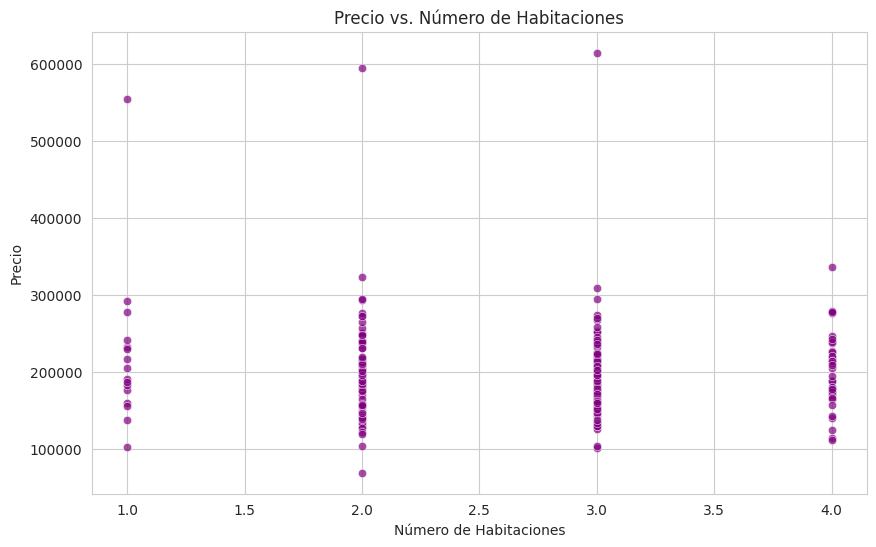

In [13]:
if not df_inm.empty and 'Metros_Cuadrados' in df_inm.columns and 'Precio' in df_inm.columns:
    # Crear un diagrama de dispersión para 'Precio' vs 'Metros_Cuadrados'
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Metros_Cuadrados', y='Precio', data=df_inm, hue='Tipo_Propiedad', size='Habitaciones', sizes=(20, 400), alpha=0.7) # `hue` y `size` para añadir más dimensiones
    plt.title('Precio vs. Metros Cuadrados')
    plt.xlabel('Metros Cuadrados')
    plt.ylabel('Precio')
    plt.legend(title='Tipo de Propiedad', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

if not df_inm.empty and 'Habitaciones' in df_inm.columns and 'Precio' in df_inm.columns:
    # Crear un diagrama de dispersión para 'Habitaciones' vs 'Precio'
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Habitaciones', y='Precio', data=df_inm, alpha=0.7, color='purple') # `alpha` para transparencia si hay muchos puntos superpuestos
    plt.title('Precio vs. Número de Habitaciones')
    plt.xlabel('Número de Habitaciones')
    plt.ylabel('Precio')
    plt.show()

---

### 5. Gráficos de Líneas (Line Plots)

**¿Qué son?**
Un gráfico de líneas muestra la evolución de una o más variables a lo largo de un período de tiempo u otra secuencia ordenada. Conecta puntos de datos individuales con segmentos de línea.

**¿Cuándo se usan?**
*   Principalmente para visualizar **series temporales** y mostrar tendencias o patrones a lo largo del tiempo.
*   Para comparar la evolución de múltiples series temporales.
*   Para mostrar cualquier tipo de datos donde el orden de los puntos en el eje X es significativo.

**¿Cómo se interpretan?**
*   **Tendencias**: ¿La línea sube, baja o se mantiene estable con el tiempo? ¿Hay tendencias cíclicas o estacionales?
*   **Picos y valles**: Indican momentos de valores altos o bajos inusuales.
*   **Variabilidad**: ¿Qué tan suave o errática es la línea? Una línea más irregular indica mayor variabilidad.

**Ejemplo paso a paso (con Python):**
Utilizaremos la columna 'Fecha_Publicacion' y 'Precio' para simular una tendencia de precios.

In [14]:
if not df_inm.empty and 'Fecha_Publicacion' in df_inm.columns and 'Precio' in df_inm.columns:
    # Para el gráfico de líneas, necesitamos una variable que evolucione con el tiempo.
    # Calculamos el precio promedio diario.
    df_inm_sorted = df_inm.sort_values('Fecha_Publicacion').copy()
    df_daily_avg_precio = df_inm_sorted.groupby('Fecha_Publicacion')['Precio'].mean().reset_index()

    # Paso 1: Crear un gráfico de líneas
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Fecha_Publicacion', y='Precio', data=df_daily_avg_precio, marker='o', color='darkgreen') # `marker` para mostrar los puntos de datos
    plt.title('Precio Promedio de Propiedades a lo largo del Tiempo')
    plt.xlabel('Fecha de Publicación')
    plt.ylabel('Precio Promedio')
    plt.xticks(rotation=45) # Rotar etiquetas del eje X para mejor legibilidad
    plt.tight_layout() # Ajustar el diseño para que las etiquetas no se superpongan
    plt.show()

---

### 6. Mapas de Calor (Heatmaps) para Matrices de Correlación

**¿Qué son?**
Un mapa de calor es una representación gráfica de datos donde los valores individuales en una matriz se representan como colores. En el contexto de EDA, se usan muy comúnmente para visualizar matrices de correlación.

**¿Cuándo se usan?**
*   Para visualizar la fuerza y dirección de la relación lineal entre múltiples pares de variables numéricas a la vez.
*   Ideal para conjuntos de datos con muchas variables, donde sería engorroso ver todos los diagramas de dispersión individualmente.

**¿Cómo se interpretan?**
*   **Color**: La intensidad del color (o el color en sí, dependiendo de la paleta) indica la magnitud de la correlación. Generalmente, colores más oscuros o un color específico (p. ej., rojo) pueden indicar correlaciones fuertes positivas, mientras que otro color (p. ej., azul) indica correlaciones fuertes negativas, y un color neutro (p. ej., blanco o gris claro) indica poca o ninguna correlación.
*   **Escala de color**: Una leyenda o barra de color (colorbar) indica qué valores de correlación corresponden a cada color.
*   **Diagonal**: La diagonal siempre muestra una correlación de 1 (una variable consigo misma).

**Ejemplo paso a paso (con Python):**
Calcularemos la matriz de correlación para las variables numéricas de nuestro DataFrame y la visualizaremos.

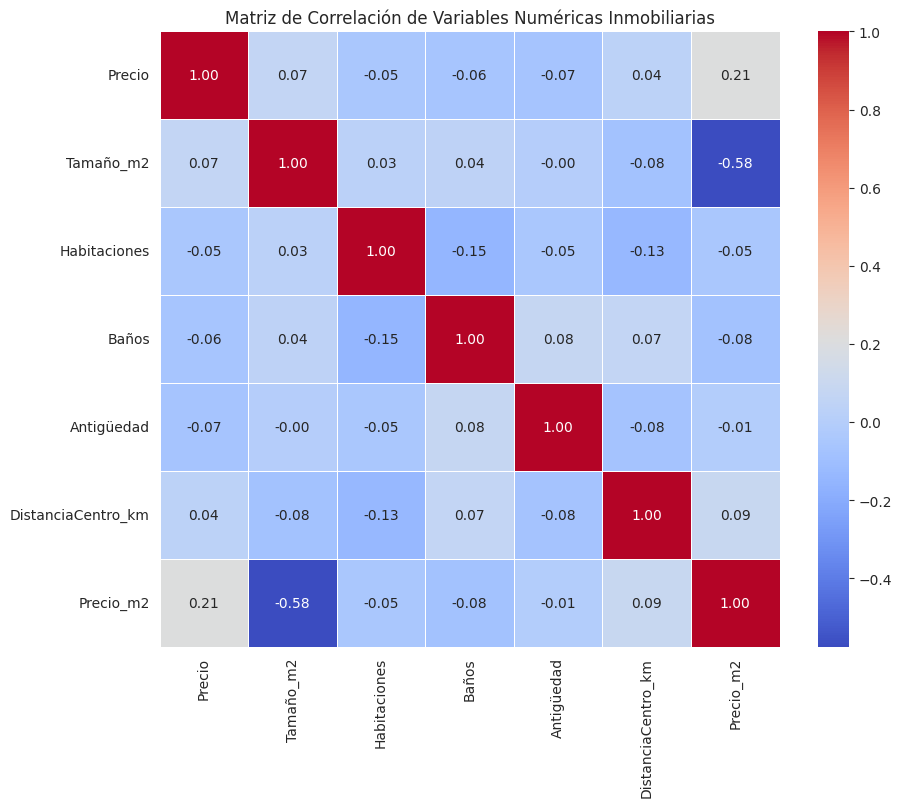

In [15]:
if not df_inm.empty:
    # Paso 1: Seleccionar solo las columnas numéricas
    # Asegurémonos de excluir columnas que no son numéricas para la correlación
    numeric_df_inm = df_inm.select_dtypes(include=np.number)

    if not numeric_df_inm.empty and len(numeric_df_inm.columns) > 1:
        # Paso 2: Calcular la matriz de correlación
        correlation_matrix = numeric_df_inm.corr()

        # Paso 3: Crear el mapa de calor
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5) # `annot=True` muestra los valores en las celdas, `cmap` es la paleta de color
        plt.title('Matriz de Correlación de Variables Numéricas Inmobiliarias')
        plt.show()
    else:
        print("No hay suficientes columnas numéricas para calcular una matriz de correlación.")

---

### 7. Pair Plots (Gráficos de Pares)

**¿Qué son?**
Un pair plot (o scatter plot matrix) crea una cuadrícula de gráficos que muestran la relación entre cada par de variables en un conjunto de datos. En la diagonal, suele mostrar la distribución de cada variable individual (por ejemplo, con un histograma o KDE).

**¿Cuándo se usan?**
*   Cuando se quiere obtener una visión general rápida de las distribuciones de todas las variables numéricas y sus relaciones bivariadas.
*   Útil para conjuntos de datos con un número moderado de variables numéricas.
*   Para identificar rápidamente correlaciones, agrupaciones y tendencias en los datos.

**¿Cómo se interpretan?**
*   **Diagonal**: Muestra la distribución de cada variable individual (generalmente un histograma o KDE).
*   **Fuera de la diagonal**: Cada subgráfico es un diagrama de dispersión que muestra la relación entre dos variables diferentes. Se interpretan como los diagramas de dispersión individuales, buscando dirección, fuerza, forma y valores atípicos.
*   **Color (hue)**: Se puede añadir una variable categórica para colorear los puntos, permitiendo ver cómo las relaciones varían entre grupos.

**Ejemplo paso a paso (con Python):**
Utilizaremos algunas variables numéricas de nuestro DataFrame y 'Tipo_Propiedad' para diferenciar.

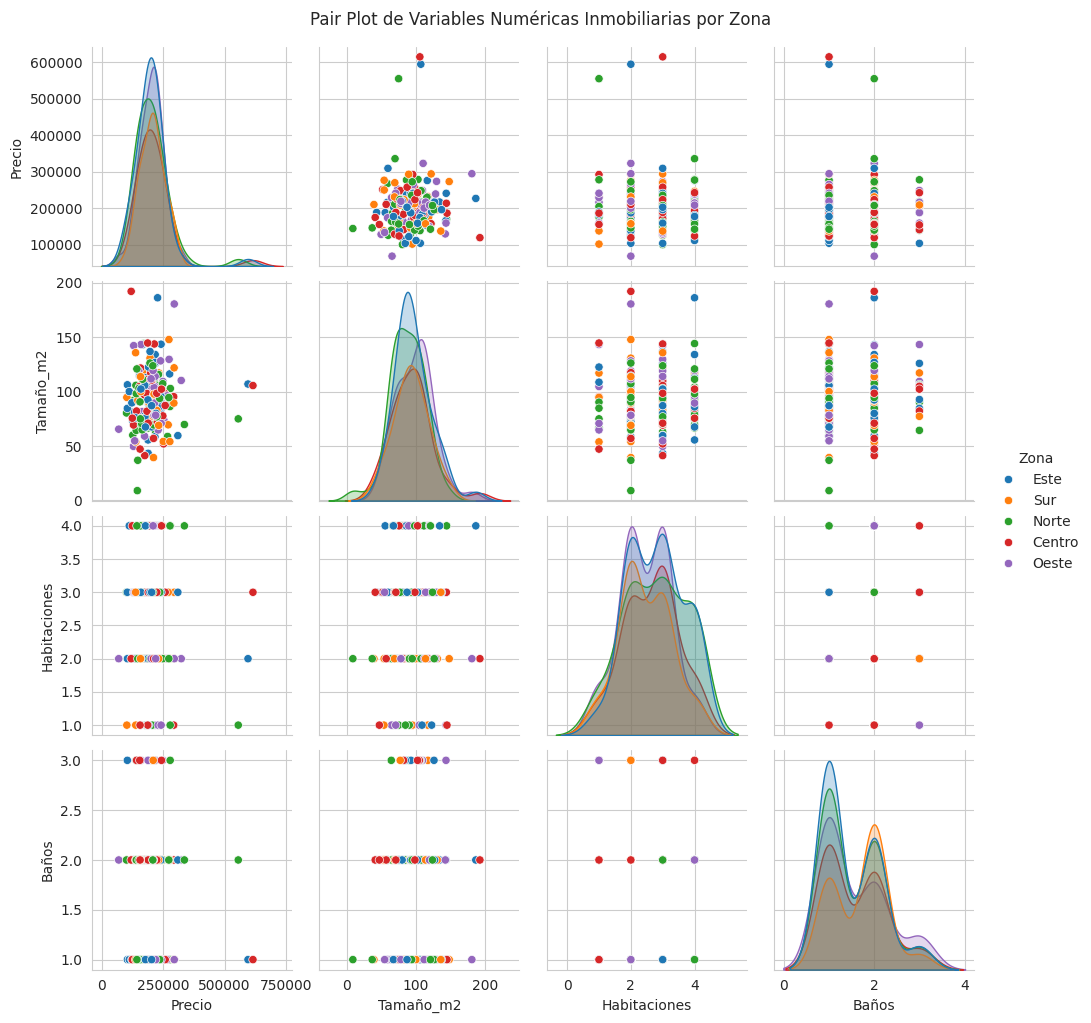

In [19]:
if not df_inm.empty and 'Precio' in df_inm.columns and 'Tamaño_m2' in df_inm.columns and 'Habitaciones' in df_inm.columns and 'Zona' in df_inm.columns:
    # Paso 1: Crear el pair plot
    # Puede tomar un tiempo para conjuntos de datos grandes o con muchas variables
    # Seleccionamos un subconjunto de columnas para no sobrecargar el gráfico si hay muchas variables numéricas
    selected_cols = ['Precio', 'Tamaño_m2', 'Habitaciones', 'Baños'] # Columnas corregidas
    available_cols = [col for col in selected_cols if col in df_inm.columns]

    if len(available_cols) > 1:
        sns.pairplot(df_inm, vars=available_cols, hue='Zona', diag_kind='kde') # 'Zona' como hue
        plt.suptitle('Pair Plot de Variables Numéricas Inmobiliarias por Zona', y=1.02) # Título general actualizado
        plt.show()
    else:
        print("No hay suficientes columnas numéricas disponibles para crear un pair plot con las columnas seleccionadas.")
elif not df_inm.empty:
    print("Columnas necesarias para el Pair Plot no encontradas en el DataFrame: 'Precio', 'Tamaño_m2', 'Habitaciones', 'Zona'.")

---

### Conclusión

Estos son los gráficos más fundamentales y utilizados en el Análisis Exploratorio de Datos. Dominar su creación e interpretación te permitirá obtener una comprensión profunda de tus datos, identificar problemas, validar suposiciones y guiar los siguientes pasos en tu análisis o modelado. Recuerda que la elección del gráfico adecuado depende del tipo de variable (categórica o numérica) y de la pregunta que intentes responder.